<a href="https://colab.research.google.com/github/prog815/portfOptim/blob/master/%D0%BF%D1%80%D0%BE%D1%81%D1%82%D0%BE%D0%B9_%D0%BF%D0%BE%D1%80%D1%82%D1%84%D0%B5%D0%BB%D1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Источники

[Лучший инвестиционный портфель через симуляцию Монте-Карло в Python](https://www.machinelearningmastery.ru/best-investment-portfolio-via-monte-carlo-simulation-in-python-53286f3fe93/) 

[Портфельная теория Марковица (Википедиа)](https://ru.wikipedia.org/wiki/%D0%9F%D0%BE%D1%80%D1%82%D1%84%D0%B5%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D1%82%D0%B5%D0%BE%D1%80%D0%B8%D1%8F_%D0%9C%D0%B0%D1%80%D0%BA%D0%BE%D0%B2%D0%B8%D1%86%D0%B0)

# Загрузка данных по котировкам
Используем данные с сервиса [Yahoo.Finance](https://finance.yahoo.com/most-active)

In [1]:
! pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=6c862ef9d79e9985cc3c9702f65bb4b395e2d6ca030714f7792283a1ff66d6bf
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [2]:
import yfinance as yf

Берем несколько акций американского рынка (см. https://finance.yahoo.com/most-active) за последние 3 месяца.

In [3]:
data = yf.download(['AAPL','GE','BAC','AMD','PLUG','F'],period='3mo')

[*********************100%***********************]  6 of 6 completed


# Курсы закрытия
В расчетах будем использовать дневные курсы закрытия

In [4]:
closeData = data.Close
closeData

,AAPL,AMD,BAC,F,GE,PLUG
Date,,,,,,
2020-05-22,318.890015,55.169998,22.660000,5.65,6.41,4.11
2020-05-26,316.730011,53.189999,24.280001,5.84,6.80,4.22
2020-05-27,318.109985,52.740002,25.980000,6.03,7.29,4.33
2020-05-28,318.250000,51.740002,24.860001,5.85,6.78,4.25
2020-05-29,317.940002,53.799999,24.120001,5.71,6.57,4.21
...,...,...,...,...,...,...
2020-08-17,458.429993,82.419998,25.900000,6.98,6.47,12.20
2020-08-18,462.250000,81.660004,25.530001,6.89,6.44,12.77
2020-08-19,462.829987,81.089996,25.500000,6.87,6.38,13.65


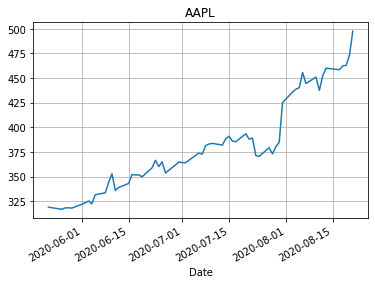

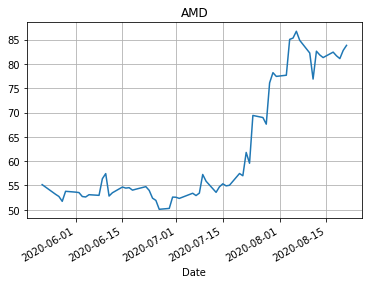

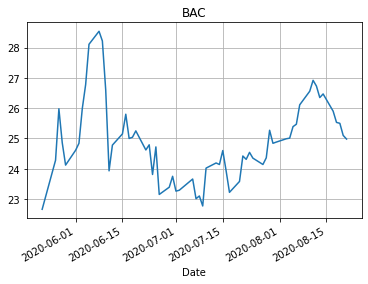

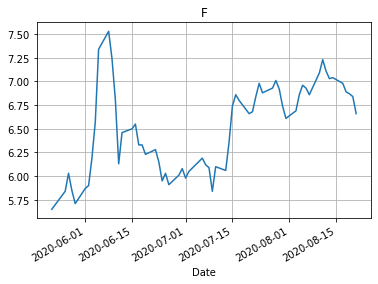

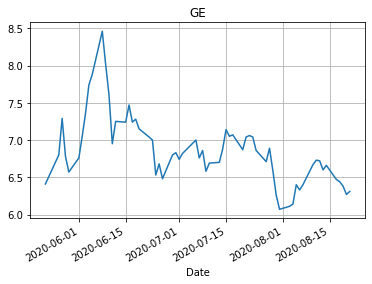

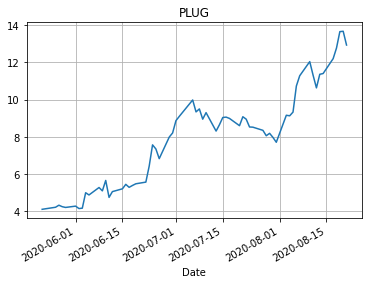

In [5]:
import matplotlib.pyplot as plt

for name in closeData.columns:
    closeData[name].plot()
    plt.grid()
    plt.title(name)
    plt.show()

# Изменение курсов
Далее понадобятся относительные изменения к предыдущему дню.

In [6]:
dCloseData = closeData.pct_change()
dCloseData

,AAPL,AMD,BAC,F,GE,PLUG
Date,,,,,,
2020-05-22,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-26,-0.006774,-0.035889,0.071492,0.033628,0.060842,0.026764
2020-05-27,0.004357,-0.008460,0.070016,0.032534,0.072059,0.026066
2020-05-28,0.000440,-0.018961,-0.043110,-0.029851,-0.069959,-0.018476
2020-05-29,-0.000974,0.039814,-0.029767,-0.023932,-0.030973,-0.009412
...,...,...,...,...,...,...
2020-08-17,-0.002611,0.013776,-0.021534,-0.008523,-0.028529,0.070175
2020-08-18,0.008333,-0.009221,-0.014286,-0.012894,-0.004637,0.046721
2020-08-19,0.001255,-0.006980,-0.001175,-0.002903,-0.009317,0.068911


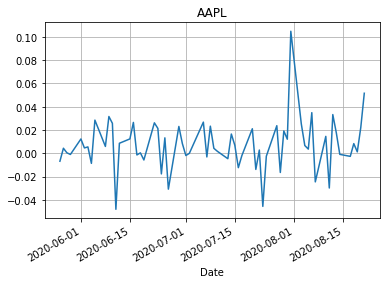

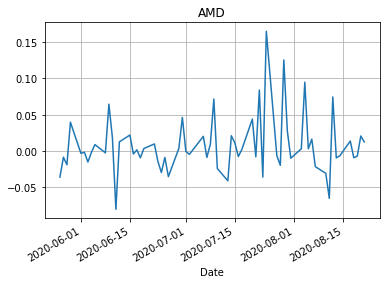

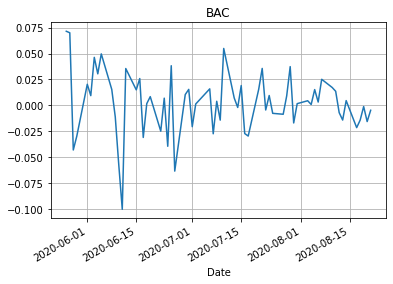

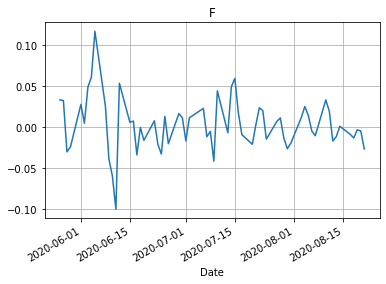

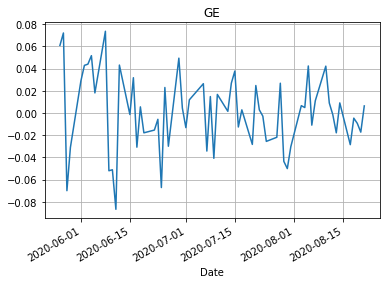

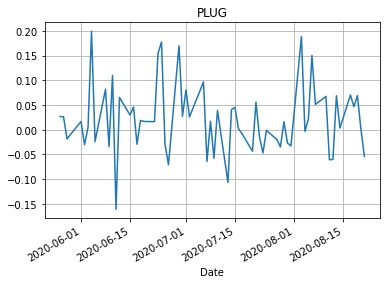

In [7]:
for name in dCloseData.columns:
    dCloseData[name].plot()
    plt.title(name)
    plt.grid()
    plt.show()

## Средняя доходность
Средняя дневная доходность по каждой акции для расчета доходности портфеля.

In [8]:
dohMean = dCloseData.mean()
dohMean

AAPL    0.007325
AMD     0.007430
BAC     0.001999
F       0.003123
GE      0.000343
PLUG    0.020700
dtype: float64

# Ковариация
Для расчета риска портфеля потребуется ковариационная матрица.

In [9]:
cov = dCloseData.cov()
cov

,AAPL,AMD,BAC,F,GE,PLUG
AAPL,0.000500,0.000293,0.000115,0.000040,0.000030,0.000264
AMD,0.000293,0.001634,0.000057,-0.000049,-0.000220,0.000013
BAC,0.000115,0.000057,0.000909,0.000707,0.000790,0.000492
F,0.000040,-0.000049,0.000707,0.001042,0.000848,0.000581
GE,0.000030,-0.000220,0.000790,0.000848,0.001199,0.000720
PLUG,0.000264,0.000013,0.000492,0.000581,0.000720,0.004937


# Случайный портфель
Будем генерить случайные портфели. В них сумма долей равна 1 (единице).

In [10]:
import numpy as np

cnt = len(dCloseData.columns)

def randPortf():
    res = np.exp(np.random.randn(cnt))
    res = res / res.sum()
    return res

r = randPortf()
print(r)
print(r.sum())

[0.07519908 0.07594622 0.20932539 0.40973202 0.1234458  0.10635148]
1.0


# Доходность портфеля
Доходность портфеля считаем как сумму долей доходностей по каждой акции в портфеле.

In [11]:
def dohPortf(r):
    return np.matmul(dohMean.values,r)

r = randPortf()
print(r)
d = dohPortf(r)
print(d)

[0.0789135  0.13031559 0.25977124 0.21157419 0.13506695 0.18435853]
0.006588795350151513


# Риск портфеля
Риск портфеля считаем через матричные произведения долей портфеля и матрицы ковариации.

In [15]:
def riskPortf(r):
    return np.sqrt(np.matmul(np.matmul(r,cov.values),r))

r = randPortf()
print(r)
rs = riskPortf(r)
print(rs)

[0.10999361 0.13739338 0.20412889 0.13648828 0.24021123 0.17178461]
0.02483674110724784


# Облако портфелей
Сгенерируем множество портфелей и выведем результат на график риск-доходность. Найдем параметры оптимального портфеля по минимальному риску и по максимальному коэффициенту Шарпа. Сравним с данными усредненного портфеля.

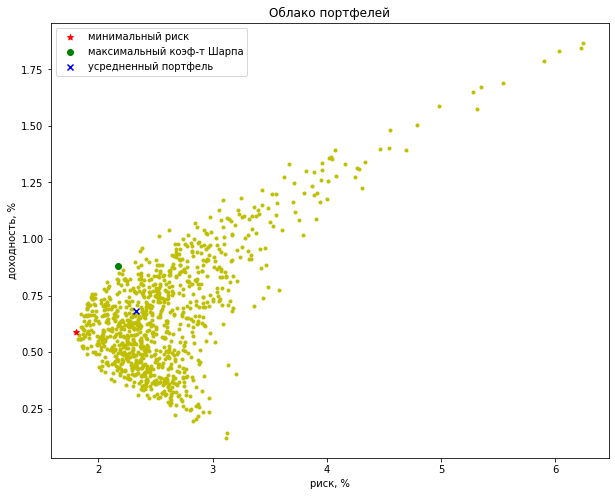

In [61]:
N = 1000

risk = np.zeros(N)
doh = np.zeros(N)
portf = np.zeros((N,cnt))

for n in range(N):
    r = randPortf()

    portf[n,:] = r
    risk[n] = riskPortf(r)
    doh[n] = dohPortf(r)

plt.figure(figsize=(10,8))

plt.scatter(risk*100,doh*100,c='y',marker='.')
plt.xlabel('риск, %')
plt.ylabel('доходность, %')
plt.title("Облако портфелей")

min_risk = np.argmin(risk)
plt.scatter([(risk[min_risk])*100],[(doh[min_risk])*100],c='r',marker='*',label='минимальный риск')

maxSharpKoef = np.argmax(doh/risk)
plt.scatter([risk[maxSharpKoef]*100],[doh[maxSharpKoef]*100],c='g',marker='o',label='максимальный коэф-т Шарпа')

r_mean = np.ones(cnt)/cnt
risk_mean = riskPortf(r_mean)
doh_mean = dohPortf(r_mean)
plt.scatter([risk_mean*100],[doh_mean*100],c='b',marker='x',label='усредненный портфель')

plt.legend()

plt.show()



Выведем данные найденных портфелей.

In [63]:
import pandas as pd

print('---------- Минимальный риск ----------')
print()
print("риск = %1.2f%%" % (float(risk[min_risk])*100.))
print("доходность = %1.2f%%" % (float(doh[min_risk])*100.)) 
print()
print(pd.DataFrame([portf[min_risk]*100],columns=dCloseData.columns,index=['доли, %']).T)
print()

print('---------- Максимальный коэффициент Шарпа ----------')
print()
print("риск = %1.2f%%" % (float(risk[maxSharpKoef])*100.))
print("доходность = %1.2f%%" % (float(doh[maxSharpKoef])*100.)) 
print()
print(pd.DataFrame([portf[maxSharpKoef]*100],columns=dCloseData.columns,index=['доли, %']).T)
print()

print('---------- Средний портфель ----------')
print()
print("риск = %1.2f%%" % (float(risk_mean)*100.)) 
print("доходность = %1.2f%%" % (float(doh_mean)*100.)) 
print()
print(pd.DataFrame([r_mean*100],columns=dCloseData.columns,index=['доли, %']).T)
print()

---------- Минимальный риск ----------

риск = 1.80%
доходность = 0.59%

        доли, %
AAPL  53.890706
AMD   12.793389
BAC    4.117541
F     16.547201
GE    10.945462
PLUG   1.705701

---------- Максимальный коэффициент Шарпа ----------

риск = 2.17%
доходность = 0.88%

        доли, %
AAPL  59.257114
AMD    8.317192
BAC    2.049882
F      8.689935
GE     4.772159
PLUG  16.913719

---------- Средний портфель ----------

риск = 2.33%
доходность = 0.68%

        доли, %
AAPL  16.666667
AMD   16.666667
BAC   16.666667
F     16.666667
GE    16.666667
PLUG  16.666667



# Выводы
Повторили классический метод расчета долей инвестиционного портфеля. Получили вполне конкретные результаты.

Оптимизация портфеля по методу Марковица предполагает сохранение параметров в будущем (корреляций между отдельными инструментами и уровня их доходности). Но это не гарантировано. В следующих работах предстоит это проверить.

Понятно, что положительного результата от обозначенной выше проверки ожидать не стоит. Но тогда можно поискать как доработать метод Марковица для получения более гарантированного дохода в будущем. Вот тема для еще одного исследования.